In [182]:
# External Python Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Internal Python Packages
import os
import sys
import re

In [183]:
iowa = pd.read_csv('C:/Users/12678/OneDriveDrexelUniversity/Documents/Computer Vision Engineer/Case_Competitions/PhillyCodeFest/Iowa/3-Year_Recidivism_for_Offenders_Released_from_Prison_in_Iowa_elaborated.csv', sep=",")

In [184]:
compass = pd.read_csv('C:/Users/12678/OneDriveDrexelUniversity/Documents/Computer Vision Engineer/Case_Competitions/PhillyCodeFest/compas-scores-raw/compas-scores-raw.csv', sep=",",index_col=0)

In [185]:
iowa.columns

Index(['Fiscal Year Released', 'Recidivism Reporting Year', 'Race - Ethnicity',
       'Age At Release ', 'Convicting Offense Classification',
       'Convicting Offense Type', 'Convicting Offense Subtype',
       'Main Supervising District', 'Release Type',
       'Release type: Paroled to Detainder united',
       'Part of Target Population', 'Recidivism - Return to Prison numeric'],
      dtype='object')

In [186]:
iowa["Fiscal Year Released"] = iowa["Fiscal Year Released"].astype(str)
iowa["Recidivism Reporting Year"] = iowa["Recidivism Reporting Year"].astype(str)


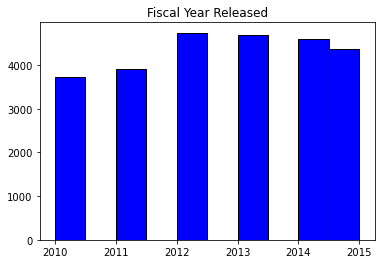

In [187]:
# Seeing the Distribution of values 

def plot_categorical_distribution(df, column_name):
    """
    Plots the distribution of a categorical column.
    """
    column = df[column_name]

    # Create a figure and plot the column
    fig, ax = plt.subplots()
    ax.hist(column, color='blue', edgecolor='black')
    ax.set_title(column_name)
    plt.show()

plot_categorical_distribution(iowa,"Fiscal Year Released")

In [188]:
for x in range(len(iowa.columns)):
    print(iowa.columns[x])
    # print(iowa[iowa.columns[x]].unique())
    # print(type(iowa[iowa.columns[x]].unique()[0]))

Fiscal Year Released
Recidivism Reporting Year
Race - Ethnicity
Age At Release 
Convicting Offense Classification
Convicting Offense Type
Convicting Offense Subtype
Main Supervising District
Release Type
Release type: Paroled to Detainder united
Part of Target Population
Recidivism - Return to Prison numeric


In [189]:
# Cleaning. Distributing Null Values as a proportion of the distribution of the column. 
def distribution_as_proportion_of_column(df, column_name):
    ''' 
     Returns the distribution of a column as a proportion of the column.'''
     
    missing = df[column_name].isnull()
    distribution = df[column_name].value_counts(normalize=True)

    df.loc[missing, column_name] = np.random.choice(distribution.index, size=len(df[missing]), p=distribution.values)

    return df

In [190]:

iowa = distribution_as_proportion_of_column(iowa,"Age At Release ")


In [191]:
print(iowa.shape)
iowa.dropna()
print(iowa.shape)

(26020, 12)
(26020, 12)


### Simplify Column Naming Conventions

In [192]:
# Printing out column values
iowa.columns

Index(['Fiscal Year Released', 'Recidivism Reporting Year', 'Race - Ethnicity',
       'Age At Release ', 'Convicting Offense Classification',
       'Convicting Offense Type', 'Convicting Offense Subtype',
       'Main Supervising District', 'Release Type',
       'Release type: Paroled to Detainder united',
       'Part of Target Population', 'Recidivism - Return to Prison numeric'],
      dtype='object')

In [193]:
# Simplifying Names

# List of New Column Names.
Column_Names = ["Year Released",
                "Year Reviewed",
                "Race",
                "Age",
                "Sentence",
                "Offense",
                "SubOffense",
                "District",
                "Release Type",
                "Release Type Same",
                "Target",
                "Relapse"
]

Renaming_Dict = dict(zip(iowa.columns, Column_Names))

# Rename Rows
iowa.rename(columns = Renaming_Dict, inplace = True)


In [194]:
# Printing out column values
iowa.columns

Index(['Year Released', 'Year Reviewed', 'Race', 'Age', 'Sentence', 'Offense',
       'SubOffense', 'District', 'Release Type', 'Release Type Same', 'Target',
       'Relapse'],
      dtype='object')

### Cleaning Ethnicity Data


In [197]:
# Printing out unique values of Ethnicities
iowa.Race.unique()

array(['White - Non-Hispanic', 'Black - Non-Hispanic',
       'American Indian or Alaska Native - Non-Hispanic',
       'White - Hispanic', 'White -',
       'Asian or Pacific Islander - Non-Hispanic', 'Black - Hispanic',
       'American Indian or Alaska Native - Hispanic',
       'Asian or Pacific Islander - Hispanic', 'Black -', 'N/A -', nan],
      dtype=object)

In [ ]:
# Export Data Here... 

